<a href="https://colab.research.google.com/github/bomiiisong/AI_Project/blob/master/Modeling/CNN_Model_Capacity_check_Before_starting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU Information - /device:GPU:0 

Tue Apr  6 07:03:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    70W / 149W |    124MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
import keras 

keras.__version__

'2.4.3'

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/sample.zip'

-rw------- 1 root root 10584142 Apr  6 07:01 '/content/drive/My Drive/Colab Notebooks/datasets/sample.zip'


In [7]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/sample.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/sample.zip
   creating: sample/
   creating: sample/test/
   creating: sample/test/best/
  inflating: sample/test/best/000.jpg  
  inflating: sample/test/best/1.jpg  
  inflating: sample/test/best/1Z574CC31Q_1.jpg  
  inflating: sample/test/best/2.jpg  
  inflating: sample/test/best/20190108001108277_1546913586_1.jpg  
  inflating: sample/test/best/3.jpg  
  inflating: sample/test/best/7.jpg  
  inflating: sample/test/best/992AAF455FC20EDF22.jpg  
  inflating: sample/test/best/F43DA2CD-11B4-4A36-A060-BCD81A23C13E_4_5005_c.jpeg  
 extracting: sample/test/best/Facetune_17-03-2019-23-35-13.jpg  
  inflating: sample/test/best/NonSelfie1221.jpg  
  inflating: sample/test/best/NonSelfie1475.jpg  
  inflating: sample/test/best/Y7JleWie_400x400.jpg  
  inflating: sample/test/best/ab6d3dfa2198478b5a6236e6cd971824.jpg  
  inflating: sample/test/best/d4c89490e8f11d3c7c8857b8d73c9fec.jpg  
 extracting: sample/test/best/d_a48Ud018svc1h3b67o

In [8]:
!ls -l

total 12
drwx------ 5 root root 4096 Apr  6 07:04 drive
drwx------ 4 root root 4096 Apr  6  2021 sample
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data


In [11]:
train_dir = '/content/sample/train'
test_dir = '/content/sample/test'

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# image augmentation : train data에만 적용
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=10, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(test_dir, target_size=(150,150),
                                                    batch_size=10, class_mode='binary')
                                   

Found 154 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 : ', data_batch.shape)
    print('배치 레이블 크기 : ', labels_batch.shape)
    break

배치 데이터 크기 :  (10, 150, 150, 3)
배치 레이블 크기 :  (10,)


# Model 1 : Hidden layer 2개

In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
%%time

Hist_model = model.fit(train_generator, 
                       steps_per_epoch=train_generator.n // train_generator.batch_size, 
                       epochs=200,
                       validation_data=valid_generator, 
                       validation_steps=valid_generator.n // valid_generator.batch_size)

Epoch 1/200
15/15 [==============================] - 1s 86ms/step - loss: 0.5186 - accuracy: 0.7569 - val_loss: 1.0310 - val_accuracy: 0.5500
Epoch 2/200
15/15 [==============================] - 1s 87ms/step - loss: 0.4889 - accuracy: 0.7778 - val_loss: 0.9402 - val_accuracy: 0.6167
Epoch 3/200
15/15 [==============================] - 1s 87ms/step - loss: 0.3910 - accuracy: 0.8056 - val_loss: 0.9936 - val_accuracy: 0.6833
Epoch 4/200
15/15 [==============================] - 1s 83ms/step - loss: 0.3752 - accuracy: 0.7986 - val_loss: 1.3117 - val_accuracy: 0.6000
Epoch 5/200
15/15 [==============================] - 1s 83ms/step - loss: 0.3777 - accuracy: 0.8542 - val_loss: 1.6809 - val_accuracy: 0.5500
Epoch 6/200
15/15 [==============================] - 1s 90ms/step - loss: 0.3786 - accuracy: 0.7986 - val_loss: 1.1484 - val_accuracy: 0.6667
Epoch 7/200
15/15 [==============================] - 1s 84ms/step - loss: 0.3974 - accuracy: 0.7986 - val_loss: 1.5665 - val_accuracy: 0.5833
Epoch 

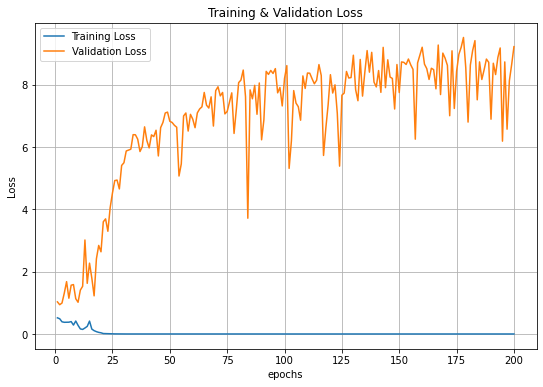

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_model.history['loss'])
plt.plot(epochs, Hist_model.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel( 'epochs' )
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

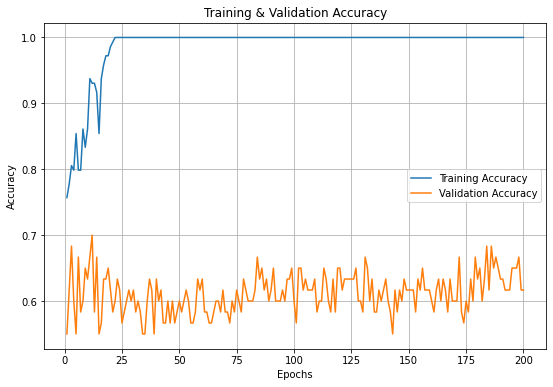

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_model.history['accuracy'])
plt.plot(epochs, Hist_model.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [28]:
loss, accuracy = model.evaluate(valid_generator,steps =6)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

6/6 [==============================] - 0s 52ms/step - loss: 9.2818 - accuracy: 0.6167
Loss : 9.28182
Accuracy : 0.61667


In [27]:
valid_generator.n // valid_generator.batch_size

6

# Model 2 : only selfie

In [29]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/selfie.zip'

-rw------- 1 root root 5418338 Apr  6 07:42 '/content/drive/My Drive/Colab Notebooks/datasets/selfie.zip'


In [31]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/selfie.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/selfie.zip
   creating: selfie/
   creating: selfie/test/
   creating: selfie/test/best/
  inflating: selfie/test/best/000.jpg  
  inflating: selfie/test/best/1.jpg  
  inflating: selfie/test/best/1Z574CC31Q_1.jpg  
  inflating: selfie/test/best/2.jpg  
  inflating: selfie/test/best/20190108001108277_1546913586_1.jpg  
  inflating: selfie/test/best/3.jpg  
  inflating: selfie/test/best/7.jpg  
  inflating: selfie/test/best/992AAF455FC20EDF22.jpg  
  inflating: selfie/test/best/unnamed.jpg  
  inflating: selfie/test/best/다운로드 (1).jpg  
  inflating: selfie/test/best/다운로드 (2).jpg  
  inflating: selfie/test/best/다운로드 (3).jpg  
  inflating: selfie/test/best/다운로드 (4).jpg  
  inflating: selfie/test/best/다운로드 (5).jpg  
  inflating: selfie/test/best/다운로드 (6).jpg  
  inflating: selfie/test/best/다운로드 (7).jpg  
  inflating: selfie/test/best/다운로드.jpg  
   creating: selfie/test/worst/
  inflating: selfie/test/worst/8ywu7d44ari1l84309bv.jpg  

In [32]:
train_dir = '/content/selfie/train'
test_dir = '/content/selfie/test'

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=10, class_mode='binary') 

valid_generator = valid_datagen.flow_from_directory(test_dir, target_size=(150,150),
                                                    batch_size=10, class_mode='binary') 

Found 81 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [34]:
from keras import layers
from keras import models

selfie = models.Sequential()
selfie.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
selfie.add(layers.MaxPooling2D((2,2)))
selfie.add(layers.Conv2D(64, (3,3), activation='relu'))
selfie.add(layers.MaxPooling2D((2,2)))
selfie.add(layers.Conv2D(128, (3,3), activation='relu'))
selfie.add(layers.MaxPooling2D((2,2)))
selfie.add(layers.Conv2D(128, (3,3), activation='relu'))
selfie.add(layers.MaxPooling2D((2,2)))

selfie.add(layers.Flatten())

selfie.add(layers.Dense(512, activation='relu'))
selfie.add(layers.Dense(256, activation='relu'))
selfie.add(layers.Dropout(0.5))
selfie.add(layers.Dense(1, activation='sigmoid'))

In [35]:
selfie.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [36]:
selfie.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
%%time

Hist_selfie = selfie.fit(train_generator, 
                         steps_per_epoch=train_generator.n // train_generator.batch_size, 
                         epochs=200,
                        validation_data=valid_generator, 
                         validation_steps=valid_generator.n // valid_generator.batch_size) # steps_per_epoch : input shape으로 나누어지도록

Epoch 1/200
8/8 [==============================] - 2s 163ms/step - loss: 0.7182 - accuracy: 0.5066 - val_loss: 0.6973 - val_accuracy: 0.3750
Epoch 2/200
8/8 [==============================] - 1s 95ms/step - loss: 0.6943 - accuracy: 0.4357 - val_loss: 0.7148 - val_accuracy: 0.3750
Epoch 3/200
8/8 [==============================] - 1s 90ms/step - loss: 0.6897 - accuracy: 0.4951 - val_loss: 0.7161 - val_accuracy: 0.4000
Epoch 4/200
8/8 [==============================] - 1s 95ms/step - loss: 0.6989 - accuracy: 0.4464 - val_loss: 0.6960 - val_accuracy: 0.3750
Epoch 5/200
8/8 [==============================] - 1s 96ms/step - loss: 0.6842 - accuracy: 0.5494 - val_loss: 0.7933 - val_accuracy: 0.4000
Epoch 6/200
8/8 [==============================] - 1s 96ms/step - loss: 0.6910 - accuracy: 0.5676 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 7/200
8/8 [==============================] - 1s 93ms/step - loss: 0.6825 - accuracy: 0.6535 - val_loss: 0.6857 - val_accuracy: 0.6250
Epoch 8/200
8/8 [==

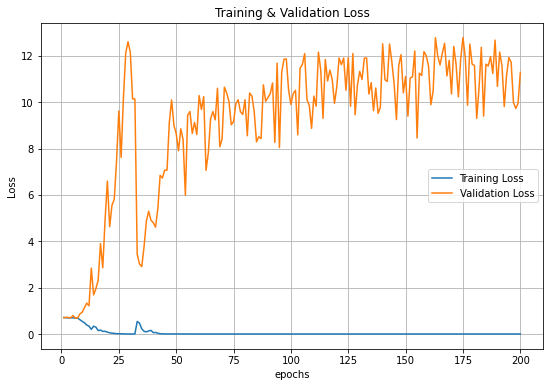

In [38]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_selfie.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_selfie.history['loss'])
plt.plot(epochs, Hist_selfie.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel( 'epochs' )
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [40]:
self_loss, self_accuracy = selfie.evaluate(valid_generator,steps = 49.8)

print(f'Loss : {self_loss:.5f}')
print(f'Accuracy : {self_accuracy:.5f}')

49/49 [==============================] - 0s 7ms/step - loss: 11.0448 - accuracy: 0.5778
Loss : 11.04479
Accuracy : 0.57778


# Model 3 : only Full Body

In [41]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/full.zip'

-rw------- 1 root root 5166392 Apr  6 07:42 '/content/drive/My Drive/Colab Notebooks/datasets/full.zip'


In [45]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/full.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/full.zip
   creating: full/
   creating: full/test/
   creating: full/test/best/
  inflating: full/test/best/F43DA2CD-11B4-4A36-A060-BCD81A23C13E_4_5005_c.jpeg  
 extracting: full/test/best/Facetune_17-03-2019-23-35-13.jpg  
  inflating: full/test/best/NonSelfie1221.jpg  
  inflating: full/test/best/NonSelfie1475.jpg  
  inflating: full/test/best/Y7JleWie_400x400.jpg  
  inflating: full/test/best/d4c89490e8f11d3c7c8857b8d73c9fec.jpg  
 extracting: full/test/best/d_a48Ud018svc1h3b67o9bbq6v_49631m.jpg  
  inflating: full/test/best/images (10).jpg  
  inflating: full/test/best/images (6).jpg  
  inflating: full/test/best/images (7).jpg  
  inflating: full/test/best/images (8).jpg  
  inflating: full/test/best/images (9).jpg  
  inflating: full/test/best/unnamed (1).jpg  
 extracting: full/test/best/unnamed (2).jpg  
  inflating: full/test/best/unnamed (4).jpg  
  inflating: full/test/best/unnamed.jpg  
   creating: full/test/worst

In [46]:
train_dir = '/content/full/train'
test_dir = '/content/full/test'

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                              batch_size=10, class_mode='binary')
valid_gen = valid_datagen.flow_from_directory(test_dir, target_size=(150,150),
                                              batch_size=10, class_mode='binary')

Found 66 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [49]:
from keras import layers
from keras import models

full = models.Sequential()
full.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
full.add(layers.MaxPooling2D((2,2)))
full.add(layers.Conv2D(64, (3,3), activation='relu'))
full.add(layers.MaxPooling2D((2,2)))
full.add(layers.Conv2D(128, (3,3), activation='relu'))
full.add(layers.MaxPooling2D((2,2)))
full.add(layers.Conv2D(128, (3,3), activation='relu'))
full.add(layers.MaxPooling2D((2,2)))

full.add(layers.Flatten())

full.add(layers.Dense(512, activation='relu'))
full.add(layers.Dense(256, activation='relu'))
full.add(layers.Dropout(0.5))
full.add(layers.Dense(1, activation='sigmoid'))

In [50]:
full.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
%%time

hist_full = full.fit(train_gen, 
                     steps_per_epoch=train_gen.n // train_gen.batch_size,
                     epochs=200,
                     validation_data=valid_gen,
                     validation_steps=valid_gen.n // valid_gen.batch_size)

Epoch 1/200
6/6 [==============================] - 1s 143ms/step - loss: 0.6961 - accuracy: 0.6481 - val_loss: 0.6984 - val_accuracy: 0.5333
Epoch 2/200
6/6 [==============================] - 1s 151ms/step - loss: 0.7537 - accuracy: 0.3791 - val_loss: 0.6930 - val_accuracy: 0.4667
Epoch 3/200
6/6 [==============================] - 1s 85ms/step - loss: 0.6935 - accuracy: 0.5673 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 4/200
6/6 [==============================] - 0s 87ms/step - loss: 0.6906 - accuracy: 0.6603 - val_loss: 0.6898 - val_accuracy: 0.6000
Epoch 5/200
6/6 [==============================] - 0s 83ms/step - loss: 0.6857 - accuracy: 0.7055 - val_loss: 0.6784 - val_accuracy: 0.5667
Epoch 6/200
6/6 [==============================] - 0s 85ms/step - loss: 0.6965 - accuracy: 0.4661 - val_loss: 0.6520 - val_accuracy: 0.7000
Epoch 7/200
6/6 [==============================] - 0s 83ms/step - loss: 0.6471 - accuracy: 0.5823 - val_loss: 0.6393 - val_accuracy: 0.6000
Epoch 8/200
6/6 [=

In [54]:
full_loss, full_accuracy = full.evaluate(valid_gen,steps=valid_gen.n // valid_gen.batch_size)

print(f'Loss : {full_loss:.5f}')
print(f'Accuracy : {full_accuracy:.5f}')

3/3 [==============================] - 0s 56ms/step - loss: 14.1182 - accuracy: 0.6667
Loss : 14.11817
Accuracy : 0.66667


# Model 4 : Augmentation

In [55]:
train_dir = '/content/sample/train'
test_dir = '/content/sample/test'

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                              batch_size=10, class_mode='binary')
valid_gen = valid_datagen.flow_from_directory(test_dir, target_size=(150,150),
                                              batch_size=10, class_mode='binary')

Found 154 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [57]:
from keras import layers
from keras import models

augModel = models.Sequential()
augModel.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
augModel.add(layers.MaxPooling2D((2,2)))
augModel.add(layers.Conv2D(64, (3,3), activation='relu'))
augModel.add(layers.MaxPooling2D((2,2)))
augModel.add(layers.Conv2D(128, (3,3), activation='relu'))
augModel.add(layers.MaxPooling2D((2,2)))
augModel.add(layers.Conv2D(128, (3,3), activation='relu'))
augModel.add(layers.MaxPooling2D((2,2)))

augModel.add(layers.Flatten())
augModel.add(layers.Dense(512, activation='relu'))
augModel.add(layers.Dense(256, activation='relu'))
augModel.add(layers.Dropout(0.5))
augModel.add(layers.Dense(1, activation='sigmoid'))

In [59]:
augModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [60]:
augModel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
%%time

hist_aug = augModel.fit(train_gen,
                        steps_per_epoch=train_gen.n // train_gen.batch_size,
                        epochs=200,
                        validation_data=valid_gen,
                        validation_steps=valid_gen.n // valid_gen.batch_size)

Epoch 1/200
15/15 [==============================] - 3s 154ms/step - loss: 0.7147 - accuracy: 0.4965 - val_loss: 0.7019 - val_accuracy: 0.4667
Epoch 2/200
15/15 [==============================] - 2s 135ms/step - loss: 0.6917 - accuracy: 0.4935 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 3/200
15/15 [==============================] - 2s 136ms/step - loss: 0.6912 - accuracy: 0.5282 - val_loss: 0.6926 - val_accuracy: 0.5833
Epoch 4/200
15/15 [==============================] - 2s 133ms/step - loss: 0.6913 - accuracy: 0.5268 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/200
15/15 [==============================] - 2s 134ms/step - loss: 0.6955 - accuracy: 0.4396 - val_loss: 0.6928 - val_accuracy: 0.5833
Epoch 6/200
15/15 [==============================] - 2s 132ms/step - loss: 0.6919 - accuracy: 0.4634 - val_loss: 0.6899 - val_accuracy: 0.5833
Epoch 7/200
15/15 [==============================] - 2s 133ms/step - loss: 0.6919 - accuracy: 0.5004 - val_loss: 0.6949 - val_accuracy: 0.4667

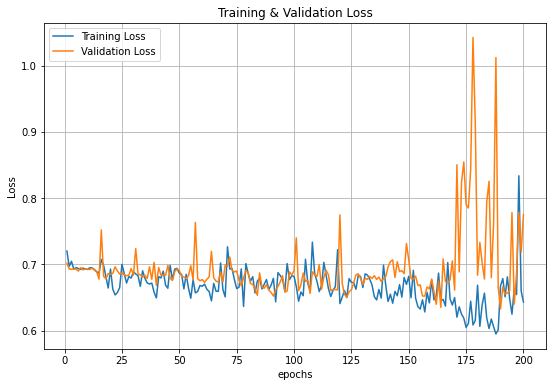

In [62]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_aug.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_aug.history['loss'])
plt.plot(epochs, hist_aug.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel( 'epochs' )
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

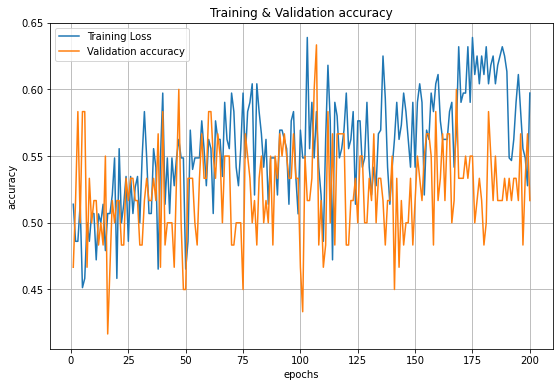

In [63]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_aug.history['accuracy']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_aug.history['accuracy'])
plt.plot(epochs, hist_aug.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel( 'epochs' )
plt.ylabel('accuracy')
plt.legend(['Training Loss', 'Validation accuracy'])
plt.grid()
plt.show()

In [64]:
aug_loss, aug_accuracy = augModel.evaluate(valid_gen, steps= valid_gen.n // valid_gen.batch_size)

print(f'Loss : {aug_loss:.5f}')
print(f'Accuracy : {aug_accuracy:.5f}')

6/6 [==============================] - 0s 49ms/step - loss: 0.6586 - accuracy: 0.5500
Loss : 0.65856
Accuracy : 0.55000


# Model 5 : DNN adj

In [67]:
from keras import layers
from keras import models

augModel2 = models.Sequential()
augModel2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
augModel2.add(layers.MaxPooling2D((2,2)))
augModel2.add(layers.Conv2D(64, (3,3), activation='relu'))
augModel2.add(layers.MaxPooling2D((2,2)))
augModel2.add(layers.Conv2D(128, (3,3), activation='relu'))
augModel2.add(layers.MaxPooling2D((2,2)))
augModel2.add(layers.Conv2D(128, (3,3), activation='relu'))
augModel2.add(layers.MaxPooling2D((2,2)))

augModel2.add(layers.Flatten())
augModel2.add(layers.Dense(512))
augModel2.add(layers.Dropout(0.5))
augModel2.add(layers.BatchNormalization())
augModel2.add(layers.Activation('relu'))

augModel2.add(layers.Dense(256))
augModel2.add(layers.Dropout(0.2))
augModel2.add(layers.BatchNormalization())
augModel2.add(layers.Activation('relu'))

augModel2.add(layers.Dense(1, activation='sigmoid'))

In [68]:
augModel2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [69]:
augModel2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [70]:
%%time

hist_aug2 = augModel2.fit(train_gen,
                          steps_per_epoch=train_gen.n//train_gen.batch_size,
                          epochs=200,
                          validation_data=valid_gen,
                          validation_steps=valid_gen.n//valid_gen.batch_size)

Epoch 1/200
15/15 [==============================] - 3s 154ms/step - loss: 0.7978 - accuracy: 0.5552 - val_loss: 1.9116 - val_accuracy: 0.5167
Epoch 2/200
15/15 [==============================] - 2s 134ms/step - loss: 0.7507 - accuracy: 0.5256 - val_loss: 3.0266 - val_accuracy: 0.4833
Epoch 3/200
15/15 [==============================] - 2s 131ms/step - loss: 0.6573 - accuracy: 0.6194 - val_loss: 2.3774 - val_accuracy: 0.5167
Epoch 4/200
15/15 [==============================] - 2s 130ms/step - loss: 0.8055 - accuracy: 0.4981 - val_loss: 1.2639 - val_accuracy: 0.5333
Epoch 5/200
15/15 [==============================] - 2s 131ms/step - loss: 0.8395 - accuracy: 0.4137 - val_loss: 0.7554 - val_accuracy: 0.5167
Epoch 6/200
15/15 [==============================] - 2s 134ms/step - loss: 0.7423 - accuracy: 0.4824 - val_loss: 0.7097 - val_accuracy: 0.4667
Epoch 7/200
15/15 [==============================] - 2s 131ms/step - loss: 0.7874 - accuracy: 0.4740 - val_loss: 0.8514 - val_accuracy: 0.5000

In [71]:
aug2_loss, aug2_accuracy = augModel2.evaluate(valid_gen, steps=valid_gen.n//valid_gen.batch_size)

print(f'Loss : {aug2_loss:.5f}')
print(f'accuracy : {aug2_accuracy:.5f}')

6/6 [==============================] - 0s 47ms/step - loss: 0.7952 - accuracy: 0.5167
Loss : 0.79525
accuracy : 0.51667


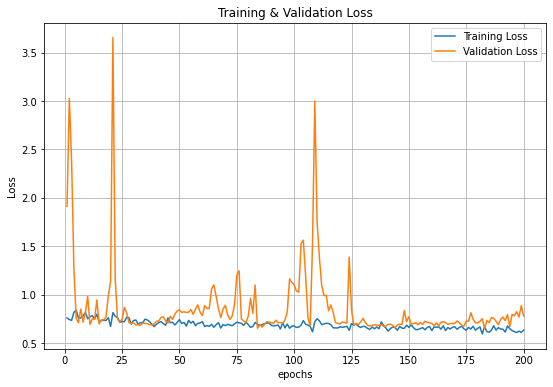

In [72]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_aug2.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_aug2.history['loss'])
plt.plot(epochs, hist_aug2.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel( 'epochs' )
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

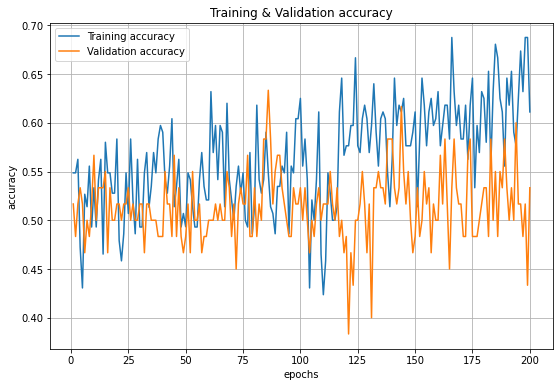

In [73]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_aug2.history['accuracy']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_aug2.history['accuracy'])
plt.plot(epochs, hist_aug2.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel( 'epochs' )
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

# 정리

* 데이터 증강 X, full body만 학습한 모델 성능이 가장 좋음(66%)

* 데이터 증강 시, overfitting은 줄어듦

* 데이터 수를 늘려서 다시 테스트 해봐야 할 듯